In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### Steps:
1. prepare the data
> NUM: no problem
>
> CAT: use dummies
2. perform linreg
> multivariate model: refer to Xtra modules
3. calc accuracy, see impt variables and not impt variables


## VS seller_items_sold (Response 1) >> sellerData
1. product_name_length (NUM) >> **productData**
2. product_desc_length (NUM) >> **productData**
3. business_segment (CAT) >> **leadData**
4. lead_type (CAT) >> **leadData**
5. lead_behaviour_profile (CAT) >> **leadData**
6. days_to_first_sale (NUM) >> **leadData**

In [3]:
# import datasets
customerData = pd.read_csv('customerData.csv')
productData = pd.read_csv('productDataNew.csv')
orderData = pd.read_csv('orderDataNew.csv')
sellerData = pd.read_csv('sellerData.csv')
leadData = pd.read_csv('leadData.csv')

In [4]:
leadData["lead_behaviour_profile"].value_counts()

cat           184
eagle          50
wolf           43
shark          10
cat, wolf       1
eagle, cat      1
Name: lead_behaviour_profile, dtype: int64

In [5]:
# take out the columns we need
a = productData[["product_id", "product_name_length", "product_description_length"]]
b = leadData[["seller_id", "business_segment", "lead_type", "lead_behaviour_profile", "days_to_first_sale"]]
res = sellerData[["seller_id", "seller_items_sold"]]
common = orderData[["product_id", "seller_id"]]

# drop out dual-combi in lead_behaviour_profile from leadData
b = b[b["lead_behaviour_profile"] != "cat, wolf"]
b = b[b["lead_behaviour_profile"] != "eagle, cat"]
b["lead_behaviour_profile"].value_counts()

cat      184
eagle     50
wolf      43
shark     10
Name: lead_behaviour_profile, dtype: int64

In [6]:
# merge a, b and response w/ common
data = common.merge(a, on="product_id").merge(b, on="seller_id").merge(res, on="seller_id")
print("Number of unique sellers: ", data["seller_id"].nunique())
# 378 bcos originally it's 380, then -2 when i drop the dual-combi lead_behaviour_profile
data

Number of unique sellers:  378


,product_id,seller_id,product_name_length,product_description_length,business_segment,lead_type,lead_behaviour_profile,days_to_first_sale,seller_items_sold
0,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,53.0,596.0,health_beauty,online_big,eagle,28.0,22
1,091107484dd7172f5dcfed173e4a960e,5670f4db5b62c43d542e1b2d56b0cf7c,50.0,260.0,health_beauty,online_big,eagle,28.0,22
2,12cbe733abde1e976549e8d6f4f020f1,5670f4db5b62c43d542e1b2d56b0cf7c,46.0,1063.0,health_beauty,online_big,eagle,28.0,22
3,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,40.0,287.0,health_beauty,online_big,eagle,28.0,22
4,26c48bbde38fc8ca6a01eff68015e35d,5670f4db5b62c43d542e1b2d56b0cf7c,39.0,1813.0,health_beauty,online_big,eagle,28.0,22
...,...,...,...,...,...,...,...,...,...
5264,f8763c8e0ef828c6d393b091888f9eb8,11fb6f6d341adbe19e81733701704635,55.0,133.0,home_decor,online_medium,wolf,52.0,3
5265,f8763c8e0ef828c6d393b091888f9eb8,11fb6f6d341adbe19e81733701704635,55.0,133.0,home_decor,online_medium,wolf,52.0,3
5266,fbb05e4acf9348440b40d667795c057e,a663d9c3797e90eac99ff60939416a56,52.0,159.0,electronics,online_beginner,cat,18.0,1
5267,fd7d446e2582c5bbc8be63f9179e98ac,99cd94252748d2bdde08e17858233602,45.0,414.0,pet,online_medium,shark,42.0,2


### convert CAT variables using dummies
1. business_segment (CAT) >> 18 cats
4. lead_type (CAT) >> 7 cats
5. lead_behaviour_profile (CAT) >> 4 cats
> https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c

In [7]:
# no. of unique categories for each CAT variables
print(data["business_segment"].nunique())
print(data["lead_type"].nunique())
print(data["lead_behaviour_profile"].nunique())

18
7
4


In [8]:
dummy = pd.get_dummies(data=data[["business_segment", "lead_type", "lead_behaviour_profile"]])
dummy

,business_segment_appliances,business_segment_baby,business_segment_bags_backpacks,business_segment_car_accessories,business_segment_electronics,business_segment_fashion_accessories,business_segment_food,business_segment_furniture,business_segment_gifts,business_segment_health_beauty,...,lead_type_offline,lead_type_online_beginner,lead_type_online_big,lead_type_online_medium,lead_type_online_small,lead_type_online_top,lead_behaviour_profile_cat,lead_behaviour_profile_eagle,lead_behaviour_profile_shark,lead_behaviour_profile_wolf
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5266,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
# drop the 3 CAT columns in data, join with dummy
test = data.drop(columns=["business_segment", "lead_type", "lead_behaviour_profile"])
newData = test.join(dummy)

# fill NaN in product_name_length & product_description_length
newData = newData.fillna(0)
newData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5269 entries, 0 to 5268
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   product_id                            5269 non-null   object 
 1   seller_id                             5269 non-null   object 
 2   product_name_length                   5269 non-null   float64
 3   product_description_length            5269 non-null   float64
 4   days_to_first_sale                    5269 non-null   float64
 5   seller_items_sold                     5269 non-null   int64  
 6   business_segment_appliances           5269 non-null   uint8  
 7   business_segment_baby                 5269 non-null   uint8  
 8   business_segment_bags_backpacks       5269 non-null   uint8  
 9   business_segment_car_accessories      5269 non-null   uint8  
 10  business_segment_electronics          5269 non-null   uint8  
 11  business_segment_

## Numeric variables only

In [17]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
# Extract Response and Predictors
y = pd.DataFrame(newData["seller_items_sold"])
X = newData[["product_name_length", "product_description_length", "days_to_first_sale"]]

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [23]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = \n', linreg.coef_)
print()

# Print the Coefficients against Predictors
coeff = pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
print(coeff)
print()

Intercept of Regression 	: b =  [358.0128507]
Coefficients of Regression 	: a = 
 [[-2.93627619 -0.0210662  -2.67857825]]

                   Predictors  Coefficients
0         product_name_length     -2.936276
1  product_description_length     -0.021066
2          days_to_first_sale     -2.678578



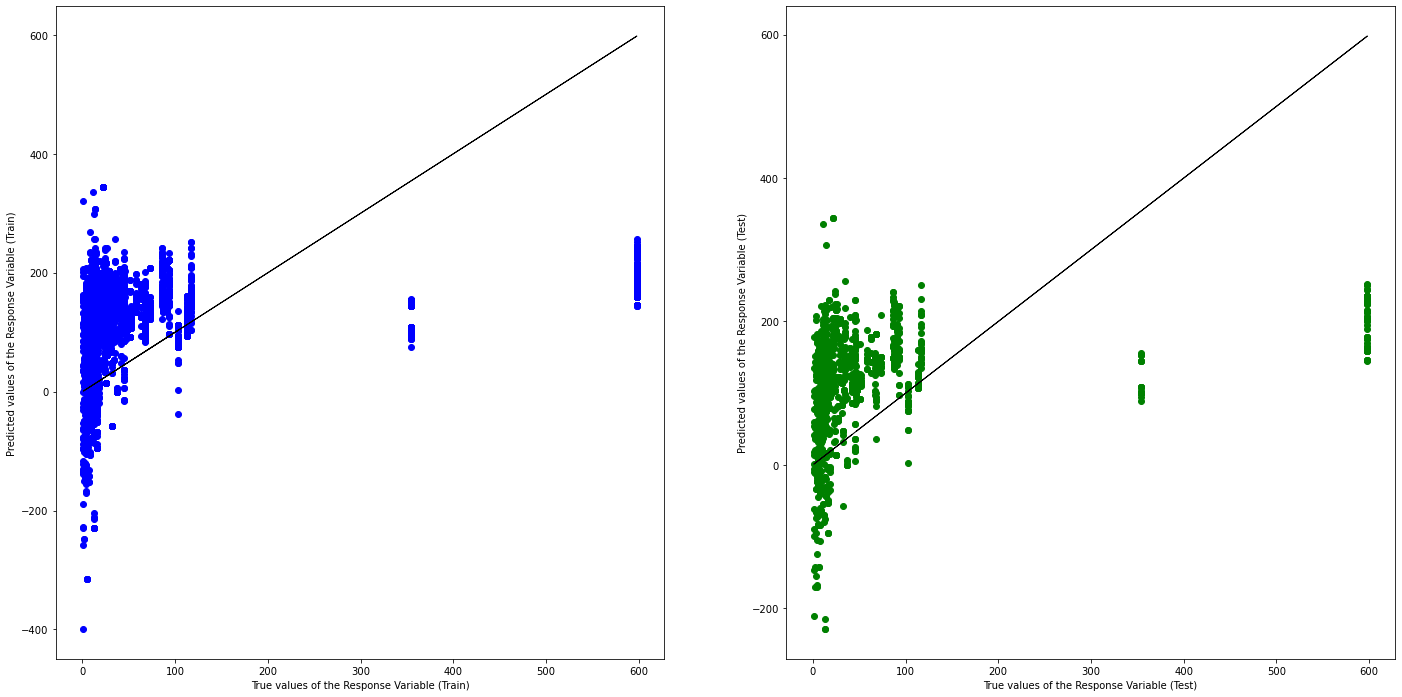

In [24]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1, color="black")
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1, color="black")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [25]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.18153780391769803
Mean Squared Error (MSE) 	: 29228.472137200435

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.20328717175894329
Mean Squared Error (MSE) 	: 29786.204939785406



## All selected variables

In [10]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
# Extract Response and Predictors
y = pd.DataFrame(newData["seller_items_sold"])
X = pd.DataFrame(newData.drop(columns = ["seller_items_sold", "seller_id", "product_id"]))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [12]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = \n', linreg.coef_)
print()

# Print the Coefficients against Predictors
coeff = pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
print(coeff)
print()

Intercept of Regression 	: b =  [126.77924881]
Coefficients of Regression 	: a = 
 [[-3.38089748e-01 -2.81119395e-03 -1.14371368e+00  3.37570446e-02
  -4.73059277e+01 -2.40339889e+01 -2.03259647e+01 -3.12515948e+01
   4.05215784e+02 -3.85089533e+01 -3.88726809e+00 -6.33142684e+00
   9.10029875e+00 -2.48848315e+01 -2.35039480e+01 -5.38780193e+01
  -1.24523280e+01 -1.93859599e+01 -5.26478642e+01 -3.72042243e+01
  -1.87475400e+01  1.45121081e+01  1.03128121e+01  2.70509977e+00
   4.04459993e+01  1.19096365e+01  2.58062448e+01 -2.17969956e+01
  -4.40372065e+01 -5.30447941e+01  2.06417357e+02 -2.94135083e+01]]

                              Predictors  Coefficients
0                    product_name_length     -0.338090
1             product_description_length     -0.002811
2                     days_to_first_sale     -1.143714
3            business_segment_appliances      0.033757
4                  business_segment_baby    -47.305928
5        business_segment_bags_backpacks    -24.033989
6

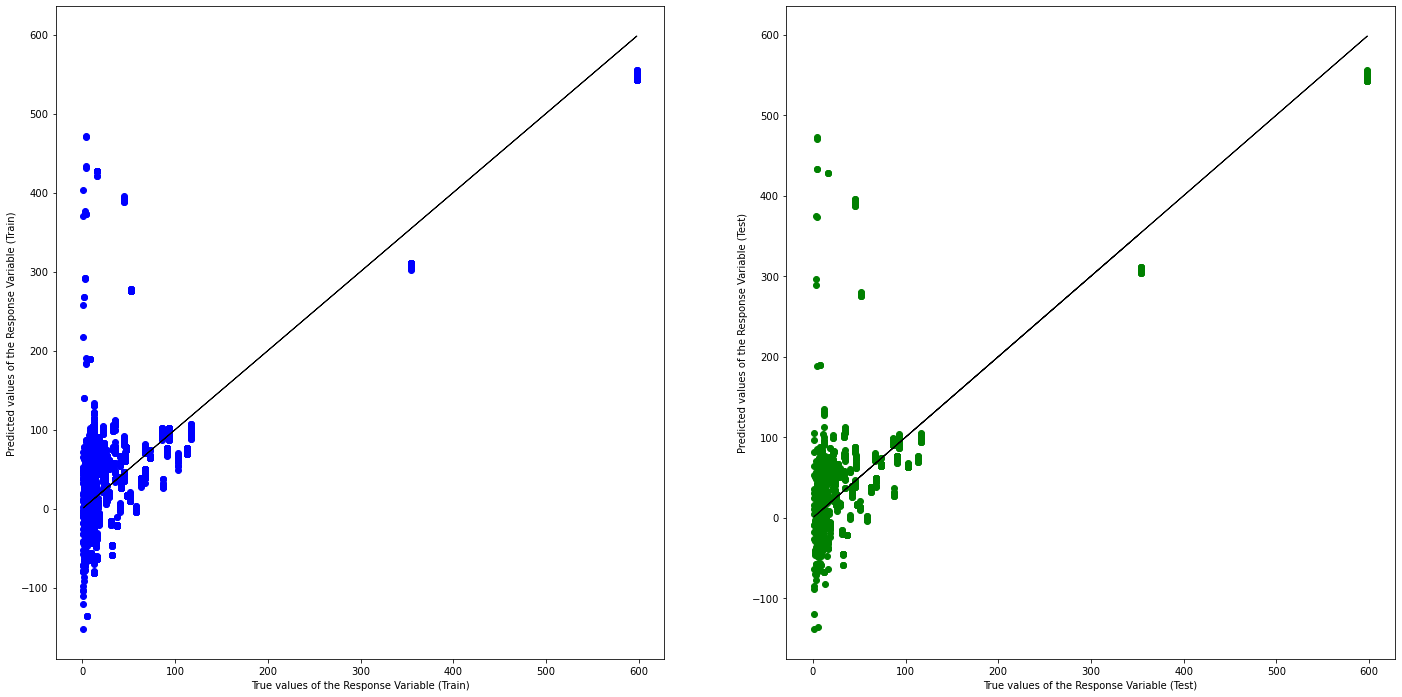

In [13]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1, color="black")
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1, color="black")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [14]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.87924645688603
Mean Squared Error (MSE) 	: 4322.755818345192

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8713809879656129
Mean Squared Error (MSE) 	: 4773.725326535918



In [15]:
# get the impt coeff
# positive correlation
coeff[coeff["Coefficients"] > 10].sort_values(by=["Coefficients"], ascending=False)


,Predictors,Coefficients
8,business_segment_fashion_accessories,405.215784
30,lead_behaviour_profile_shark,206.417357
24,lead_type_online_big,40.445999
26,lead_type_online_small,25.806245
21,lead_type_industry,14.512108
25,lead_type_online_medium,11.909637
22,lead_type_offline,10.312812


In [16]:
# negative correlation
coeff[coeff["Coefficients"] < -30].sort_values(by=["Coefficients"], ascending=True)

,Predictors,Coefficients
15,business_segment_household_utilities,-53.878019
29,lead_behaviour_profile_eagle,-53.044794
18,business_segment_stationery,-52.647864
4,business_segment_baby,-47.305928
28,lead_behaviour_profile_cat,-44.037206
9,business_segment_food,-38.508953
19,business_segment_tools,-37.204224
7,business_segment_electronics,-31.251595


In [63]:
# weak correlation
q = coeff[coeff["Coefficients"] < 10]
q[q["Coefficients"] > -10]

,Predictors,Coefficients
0,product_name_length,-0.338090
1,product_description_length,-0.002811
2,days_to_first_sale,-1.143714
3,business_segment_appliances,0.033757
10,business_segment_furniture,-3.887268
11,business_segment_gifts,-6.331427
12,business_segment_health_beauty,9.100299
23,lead_type_online_beginner,2.705100


## VS product_items_sold (Response 2) >> productData
1. lead_behaviour_profile (CAT) >> **leadData**
2. lead_type (CAT) >> **leadData**
3. business_segment (CAT) >> **leadData**
5. days_to_first_sale (NUM) >> **leadData**
4. price (NUM) >> **orderData**
6. lead_time (NUM) >> **orderData**

In [27]:
# merge all variables into 1 DF
df1 = orderData[["seller_id", "product_id", "price", "lead_time"]]
df2 = leadData[["seller_id", "lead_behaviour_profile", "lead_type", "business_segment", "days_to_first_sale"]]
res = productData[["product_id", "product_items_sold"]]

data = df1.merge(df2, on="seller_id").merge(res, on="product_id")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 0 to 5273
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seller_id               5274 non-null   object 
 1   product_id              5274 non-null   object 
 2   price                   5274 non-null   float64
 3   lead_time               5209 non-null   float64
 4   lead_behaviour_profile  3455 non-null   object 
 5   lead_type               5219 non-null   object 
 6   business_segment        5274 non-null   object 
 7   days_to_first_sale      5274 non-null   float64
 8   product_items_sold      5274 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 412.0+ KB


In [28]:
# drop rows with NaN, and remove id columns
data = data.dropna().drop(columns=["seller_id", "product_id"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3369 entries, 0 to 5273
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   3369 non-null   float64
 1   lead_time               3369 non-null   float64
 2   lead_behaviour_profile  3369 non-null   object 
 3   lead_type               3369 non-null   object 
 4   business_segment        3369 non-null   object 
 5   days_to_first_sale      3369 non-null   float64
 6   product_items_sold      3369 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 210.6+ KB


In [29]:
# convert CAT variables with get_dummies
dum = pd.get_dummies(data=data[["lead_behaviour_profile", "lead_type", "business_segment"]])

# drop the 3 CAT columns in data, join with dummy
data = data.drop(columns=["lead_behaviour_profile", "lead_type", "business_segment"])
newData = data.join(dum)
newData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3369 entries, 0 to 5273
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   price                                 3369 non-null   float64
 1   lead_time                             3369 non-null   float64
 2   days_to_first_sale                    3369 non-null   float64
 3   product_items_sold                    3369 non-null   int64  
 4   lead_behaviour_profile_cat            3369 non-null   uint8  
 5   lead_behaviour_profile_cat, wolf      3369 non-null   uint8  
 6   lead_behaviour_profile_eagle          3369 non-null   uint8  
 7   lead_behaviour_profile_eagle, cat     3369 non-null   uint8  
 8   lead_behaviour_profile_shark          3369 non-null   uint8  
 9   lead_behaviour_profile_wolf           3369 non-null   uint8  
 10  lead_type_industry                    3369 non-null   uint8  
 11  lead_type_offline

## Numeric variables only

In [30]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [31]:
# Extract Response and Predictors
y = pd.DataFrame(newData["product_items_sold"])
X = newData[["days_to_first_sale", "price", "lead_time"]]

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [32]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = \n', linreg.coef_)
print()

# Print the Coefficients against Predictors
coeff = pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
print(coeff)
print()

Intercept of Regression 	: b =  [5.96406613]
Coefficients of Regression 	: a = 
 [[ 0.01047707 -0.00371772  0.13631092]]

           Predictors  Coefficients
0  days_to_first_sale      0.010477
1               price     -0.003718
2           lead_time      0.136311



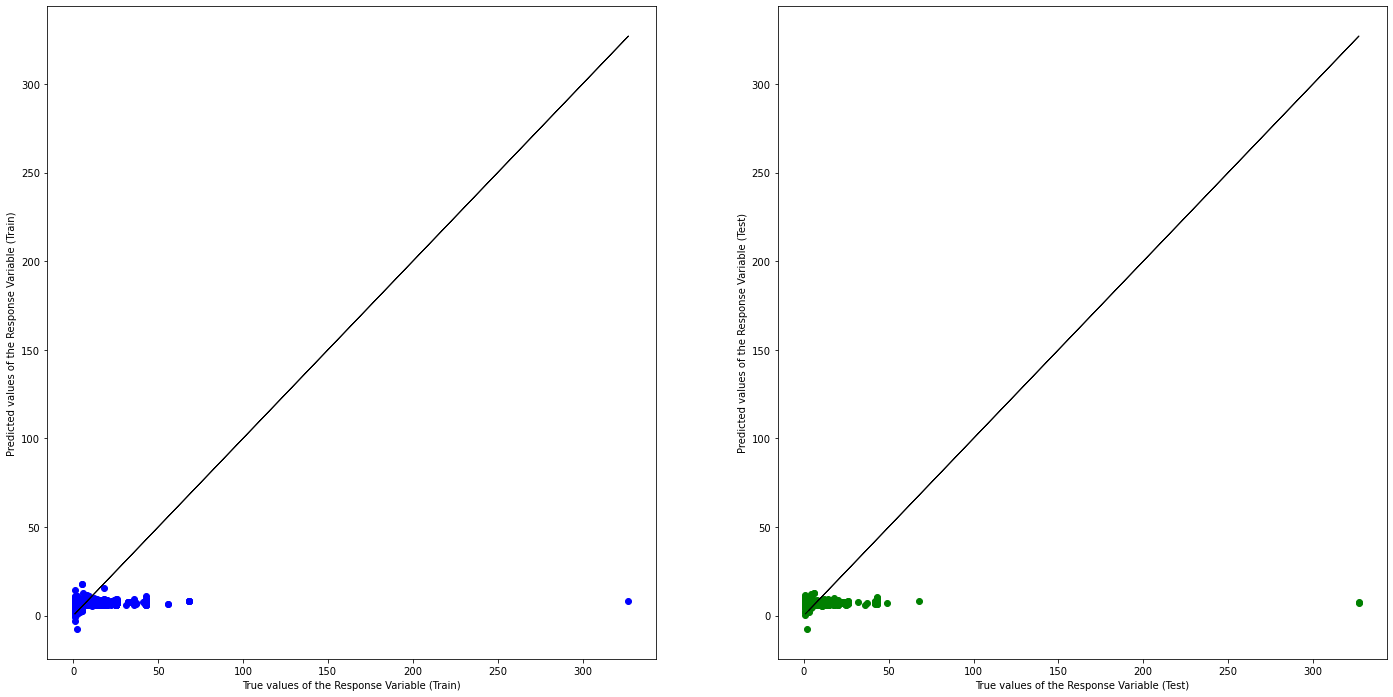

In [33]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1, color="black")
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1, color="black")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [36]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.01001640965190198
Mean Squared Error (MSE) 	: 114.17288945607471

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0030865683614548223
Mean Squared Error (MSE) 	: 314.46097403478313



## All selected variables

In [37]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
# Extract Response and Predictors
y = pd.DataFrame(newData["product_items_sold"])
X = pd.DataFrame(newData.drop(columns = ["product_items_sold"]))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [39]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = \n', linreg.coef_)
print()

# Print the Coefficients against Predictors
coeff = pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
print(coeff)
print()

Intercept of Regression 	: b =  [3.13704371]
Coefficients of Regression 	: a = 
 [[-3.38274191e-03  3.80611757e-02  1.41476689e-02  2.56514608e+00
  -4.70069224e+00  5.00999841e+00 -1.32777111e+01  8.15310707e+00
   2.25015176e+00 -8.69929826e-01 -1.44680920e+00  2.43528915e+00
   1.13856543e+00  6.68218804e-01 -9.78038694e-01 -9.47295670e-01
  -6.04946130e-02 -4.54841740e+00 -1.21692090e+00 -1.90041710e+00
   1.07875682e+00  2.69057594e+01 -3.95923268e+00 -2.62895934e+00
  -5.18130754e+00 -1.66948724e+00  1.22633709e+01 -1.70769513e+00
  -3.91830483e+00 -2.25409642e+00 -3.74229565e+00 -4.03840960e+00
  -1.21859790e+00 -2.20325078e+00]]

                              Predictors  Coefficients
0                                  price     -0.003383
1                              lead_time      0.038061
2                     days_to_first_sale      0.014148
3             lead_behaviour_profile_cat      2.565146
4       lead_behaviour_profile_cat, wolf     -4.700692
5           lead_behavio

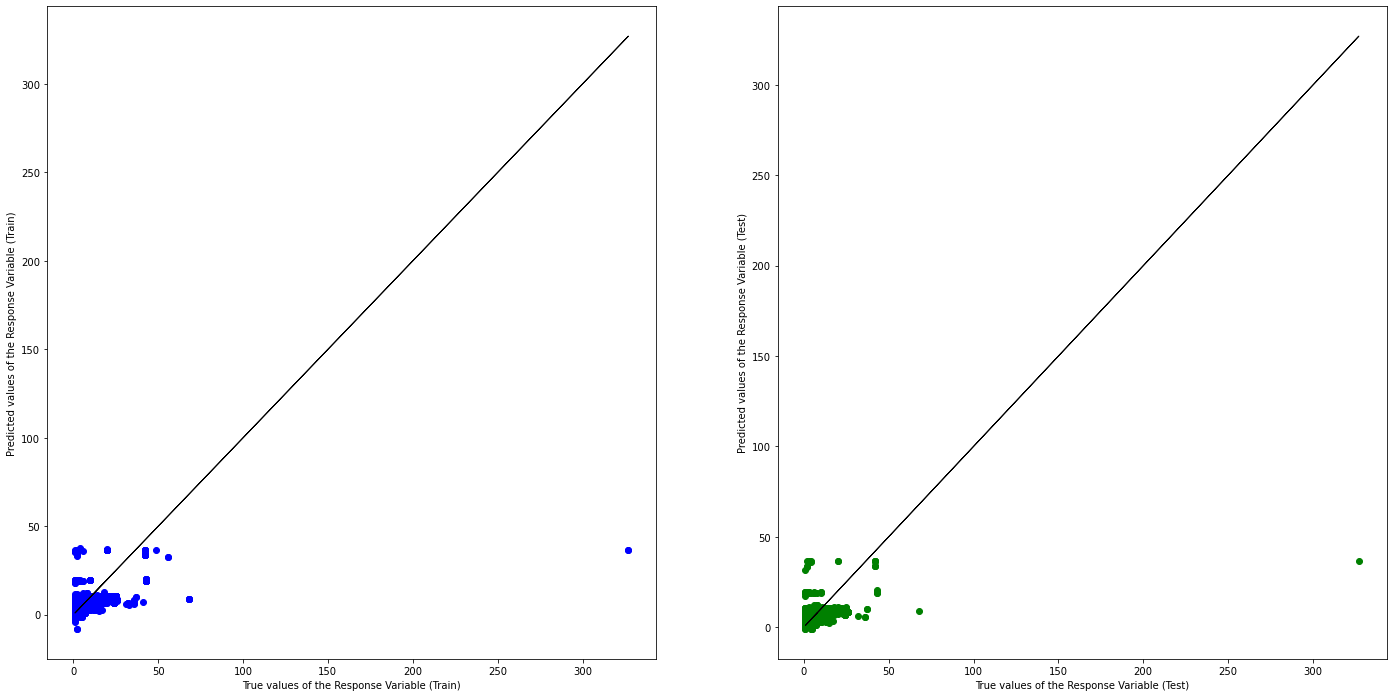

In [40]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1, color="black")
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1, color="black")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [41]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.18451863922241163
Mean Squared Error (MSE) 	: 129.00743061271217

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.15992437487832256
Mean Squared Error (MSE) 	: 157.3363083854791



In [42]:
# get the impt coeff
# positive correlation
coeff[coeff["Coefficients"] > 1].sort_values(by=["Coefficients"], ascending=False)

,Predictors,Coefficients
21,business_segment_fashion_accessories,26.905759
26,business_segment_hobbies,12.263371
7,lead_behaviour_profile_shark,8.153107
5,lead_behaviour_profile_eagle,5.009998
3,lead_behaviour_profile_cat,2.565146
11,lead_type_online_beginner,2.435289
8,lead_behaviour_profile_wolf,2.250152
12,lead_type_online_big,1.138565
20,business_segment_electronics,1.078757


In [73]:
# negative correlation
coeff[coeff["Coefficients"] < -3].sort_values(by=["Coefficients"], ascending=True)

,Predictors,Coefficients
6,"lead_behaviour_profile_eagle, cat",-13.277711
24,business_segment_gifts,-5.181308
4,"lead_behaviour_profile_cat, wolf",-4.700692
17,business_segment_baby,-4.548417
31,business_segment_stationery,-4.038410
22,business_segment_food,-3.959233
28,business_segment_household_utilities,-3.918305
30,business_segment_sports_leisure,-3.742296


In [74]:
# weak correlation
q = coeff[coeff["Coefficients"] < 0.05]
q[q["Coefficients"] > -0.05]

,Predictors,Coefficients
0,price,-0.003383
1,lead_time,0.038061
2,days_to_first_sale,0.014148


## VS product_rating (Response 3) >> productData
1. lead_time (NUM) >> **orderData**
2. delivery_performance (NUM) >> **orderData**
3. customer_state (CAT) >> **customerData** OR change to order_status
4. seller_state (CAT) >> **sellerData**
5. business_segment (CAT) >> **leadData**

In [44]:
# merge all variables into 1 DF
df1 = orderData[["customer_id", "seller_id", "product_id", "lead_time", "delivery_performance"]]
df2 = customerData[["customer_id", "customer_state"]]
df3 = sellerData[["seller_id", "seller_state"]]
df4 = leadData[["seller_id", "business_segment"]]
res = productData[["product_id", "product_rating"]]

data = df1.merge(df2, on="customer_id").merge(df3, on="seller_id").merge(df4, on="seller_id").merge(res, on="product_id")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 0 to 5273
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           5274 non-null   object 
 1   seller_id             5274 non-null   object 
 2   product_id            5274 non-null   object 
 3   lead_time             5209 non-null   float64
 4   delivery_performance  5209 non-null   float64
 5   customer_state        5274 non-null   object 
 6   seller_state          5274 non-null   object 
 7   business_segment      5274 non-null   object 
 8   product_rating        5274 non-null   float64
dtypes: float64(3), object(6)
memory usage: 412.0+ KB


In [45]:
# drop rows with NaN, and remove id columns
data = data.dropna().drop(columns=["customer_id", "seller_id", "product_id"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5209 entries, 0 to 5273
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_time             5209 non-null   float64
 1   delivery_performance  5209 non-null   float64
 2   customer_state        5209 non-null   object 
 3   seller_state          5209 non-null   object 
 4   business_segment      5209 non-null   object 
 5   product_rating        5209 non-null   float64
dtypes: float64(3), object(3)
memory usage: 284.9+ KB


In [46]:
# convert CAT variables with get_dummies
dum = pd.get_dummies(data=data[["customer_state", "seller_state", "business_segment"]])

# drop the 3 CAT columns in data, join with dummy
data = data.drop(columns=["customer_state", "seller_state", "business_segment"])
newData = data.join(dum)
newData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5209 entries, 0 to 5273
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   lead_time                             5209 non-null   float64
 1   delivery_performance                  5209 non-null   float64
 2   product_rating                        5209 non-null   float64
 3   customer_state_AC                     5209 non-null   uint8  
 4   customer_state_AL                     5209 non-null   uint8  
 5   customer_state_AM                     5209 non-null   uint8  
 6   customer_state_AP                     5209 non-null   uint8  
 7   customer_state_BA                     5209 non-null   uint8  
 8   customer_state_CE                     5209 non-null   uint8  
 9   customer_state_DF                     5209 non-null   uint8  
 10  customer_state_ES                     5209 non-null   uint8  
 11  customer_state_GO

## Numeric variables only

In [47]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [48]:
# Extract Response and Predictors
y = pd.DataFrame(newData["product_rating"])
X = newData[["lead_time", "delivery_performance"]]

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [49]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = \n', linreg.coef_)
print()

# Print the Coefficients against Predictors
coeff = pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
print(coeff)
print()

Intercept of Regression 	: b =  [4.4344907]
Coefficients of Regression 	: a = 
 [[-0.02112379 -0.00127534]]

             Predictors  Coefficients
0             lead_time     -0.021124
1  delivery_performance     -0.001275



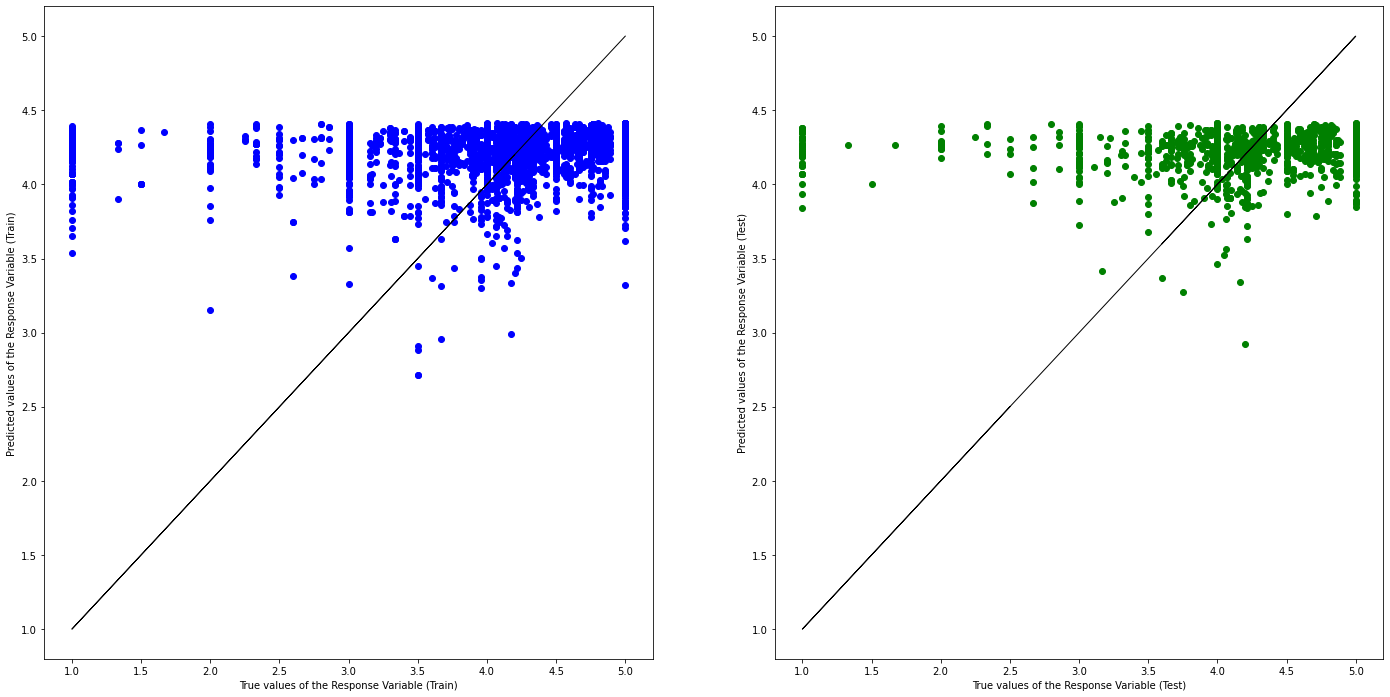

In [50]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1, color="black")
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1, color="black")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [51]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.030954086614990217
Mean Squared Error (MSE) 	: 0.7236872587854938

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.011154446972199694
Mean Squared Error (MSE) 	: 0.7020075424071014



## All selected variables

In [78]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [79]:
# Extract Response and Predictors
y = pd.DataFrame(newData["product_rating"])
X = pd.DataFrame(newData.drop(columns = ["product_rating"]))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [80]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = \n', linreg.coef_)
print()

# Print the Coefficients against Predictors
coeff = pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
print(coeff)
print()

Intercept of Regression 	: b =  [4.66508363]
Coefficients of Regression 	: a = 
 [[-2.36022217e-02 -4.70233516e-03 -2.94320939e-01  2.00166635e-01
   3.26332983e-01 -6.01602101e-15  1.14147292e-01  8.77785023e-02
  -1.81562650e-01 -2.63840451e-01 -1.55848592e-01 -4.36474154e-01
  -1.35315200e-01 -3.56994174e-01  3.05399955e-02 -1.10428044e-01
   3.36447134e-01 -9.37394545e-02  8.06009775e-02  1.18200063e-02
  -4.57101389e-02  2.66436656e-01  3.37071787e-01  1.24598755e-01
   3.02458426e-02  1.81735634e-01 -1.30708583e-01  7.70201802e-02
  -9.22766171e-01 -2.22434459e-03 -4.50063109e-01  1.55464247e-01
   3.55626719e-02 -2.54904837e-02  6.32586455e-01  4.41167956e-01
   2.20447439e-01 -6.17247759e-02  1.16403686e-01 -7.41680133e-02
  -6.51955572e-02 -8.92413235e-02  3.21178388e-01  1.57811180e-01
  -3.23449686e-01 -1.15311438e-01 -5.61414034e-02  1.24471509e-01
  -2.20382610e-01  2.30935140e-01  6.61891948e-02  2.15904070e-02
  -1.60491958e-01 -4.42574292e-02  7.12756757e-03  2.31993565

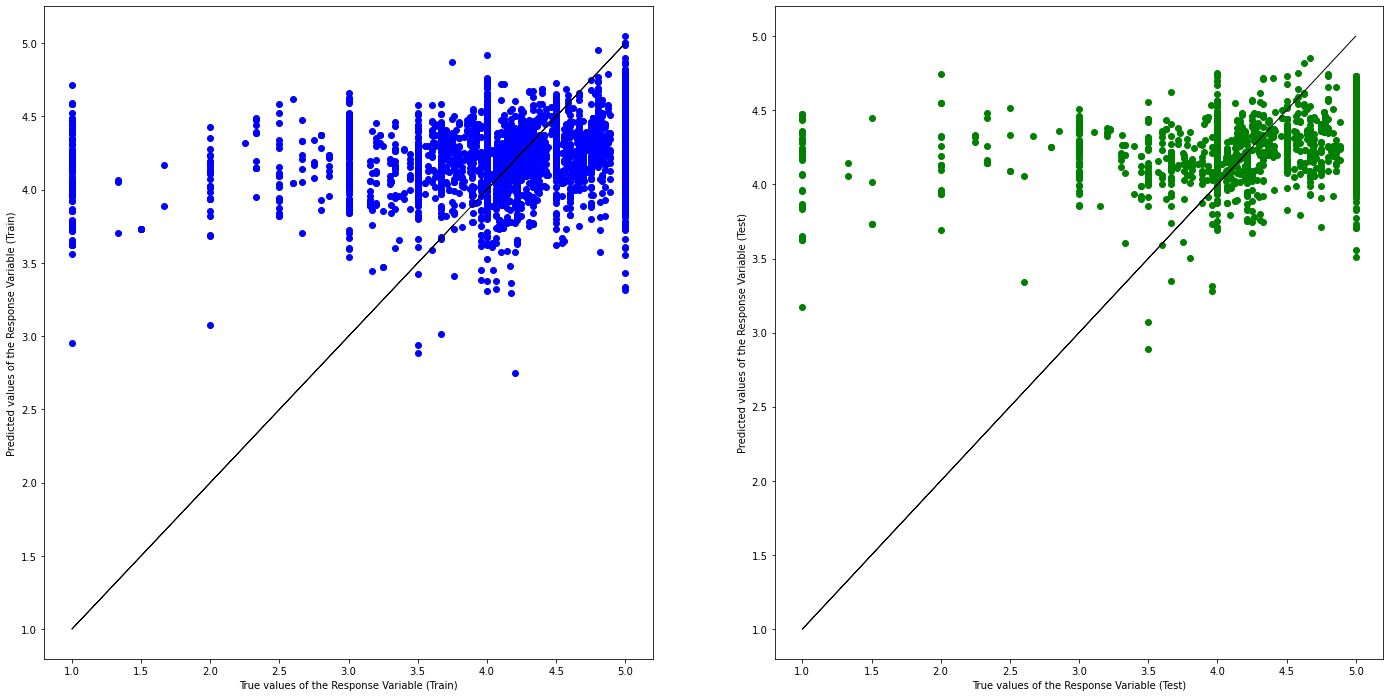

In [81]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1, color="black")
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1, color="black")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [82]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06961318233656089
Mean Squared Error (MSE) 	: 0.6733959919163817

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.054466951858686885
Mean Squared Error (MSE) 	: 0.7365361018504628



In [83]:
# get the impt coeff
# positive correlation
coeff[coeff["Coefficients"] > 0.2].sort_values(by=["Coefficients"], ascending=False)

,Predictors,Coefficients
34,seller_state_PB,0.632586
35,seller_state_PE,0.441168
22,customer_state_RO,0.337072
16,customer_state_PB,0.336447
4,customer_state_AM,0.326333
42,business_segment_baby,0.321178
21,customer_state_RN,0.266437
55,business_segment_sports_leisure,0.231994
49,business_segment_gifts,0.230935
36,seller_state_PR,0.220447


In [84]:
# negative correlation
coeff[coeff["Coefficients"] < -0.2].sort_values(by=["Coefficients"], ascending=True)

,Predictors,Coefficients
28,seller_state_BA,-0.922766
30,seller_state_DF,-0.450063
11,customer_state_MA,-0.436474
13,customer_state_MS,-0.356994
44,business_segment_car_accessories,-0.323450
2,customer_state_AC,-0.294321
9,customer_state_ES,-0.263840
48,business_segment_furniture,-0.220383


In [85]:
# weak correlation
q = coeff[coeff["Coefficients"] < 0.05]
q[q["Coefficients"] > -0.05]

,Predictors,Coefficients
0,lead_time,-2.360222e-02
1,delivery_performance,-4.702335e-03
5,customer_state_AP,-6.016021e-15
14,customer_state_MT,3.054000e-02
19,customer_state_PR,1.182001e-02
20,customer_state_RJ,-4.571014e-02
24,customer_state_SC,3.024584e-02
29,seller_state_CE,-2.224345e-03
32,seller_state_GO,3.556267e-02
33,seller_state_MG,-2.549048e-02
